# **Análise Exploratória dos Dados (EDA)**
Este notebook apresenta a Análise Exploratória de Dados (EDA) do dataset de avaliações de pedidos da Olist. O objetivo principal é extrair insights sobre a distribuição das notas, a natureza dos comentários textuais e identificar padrões que irão informar e guiar a construção do nosso modelo de classificação de sentimento.

# Visão Geral

* Importação das Blibiotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from matplotlib.ticker import PercentFormatter

* Carregamento do Arquivo

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Jessicamsza/analise-sentimentos-reviews-olist/refs/heads/main/data/olist_order_reviews_dataset.csv")

* Informações Iniciais

In [ ]:
display(Markdown("### Primeiras Linhas"))
display(df.head())

display(Markdown("### Últimas Linhas"))
display(df.tail())

display(Markdown("### Informações das Variaveis"))
display(df.info())

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras Linhas

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Últimas Linhas

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


### Informações das Variaveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

### Quantidade de valores únicos

,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


# Tratamento dos dados


* As colunas de data estão como object (texto). Vamos convertê-las para o tipo datetime para permitir análises temporais.


In [23]:
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])

display(Markdown("Verificando os tipos após a conversão:"))
df.info()

Verificando os tipos após a conversão:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


# Resumo Estatístico

In [24]:
display(Markdown("### Resumo Estatístico das Variáveis Numéricas"))
display(df.describe())

### Resumo Estatístico das Variáveis Numéricas

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN





---

* **Para a variável review_score:**

Confirmação da Positividade Extrema: A média de 4.08 já indica uma tendência positiva. No entanto, o dado mais revelador é a mediana (o valor de 50%) ser 5.0. Isso significa que pelo menos metade de todas as avaliações no dataset receberam a nota máxima.

Concentração de Notas Altas: O primeiro quartil (25%) já é a nota 4. Isso reforça a conclusão da análise de distribuição: a esmagadora maioria das avaliações está concentrada nas duas maiores notas, confirmando o forte desbalanceamento que precisará ser abordado na modelagem.

* **Para as Variáveis Temporais (review_creation_date e review_answer_timestamp):**

Período de Análise: O conjunto de dados abrange avaliações criadas entre outubro de 2016 e agosto de 2018, cobrindo um período de quase dois anos de operações. Isso nos dá uma janela de tempo considerável para analisar o comportamento dos clientes.

Latência nas Respostas: Um ponto interessante é que a última resposta a uma avaliação (2018-10-29) ocorreu cerca de dois meses após a última avaliação ser criada (2018-08-31). Isso pode indicar uma latência no processo de resposta no final do período de coleta.


---



# Valores Ausentes

### Percentual de Valores Ausentes por Coluna

review_comment_title       0.883415
review_comment_message     0.587025
review_id                  0.000000
review_score               0.000000
order_id                   0.000000
review_creation_date       0.000000
review_answer_timestamp    0.000000
tem_texto                  0.000000
tempo_de_resposta          0.000000
dtype: float64


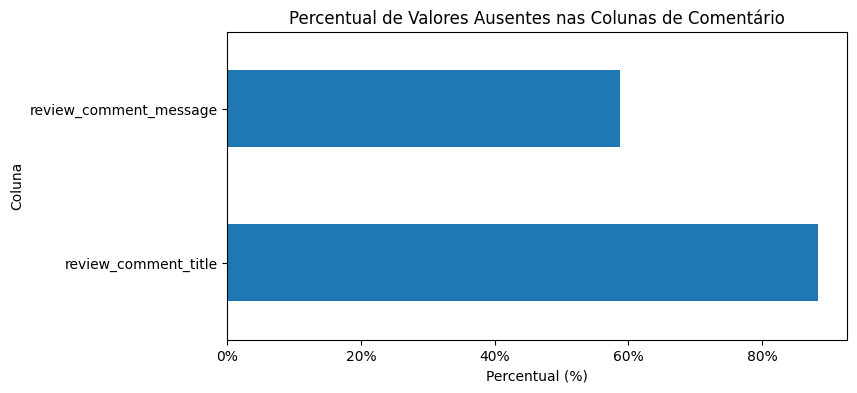

In [ ]:
display(Markdown("### Percentual de Valores Ausentes por Coluna"))
missing_data = df.isna().mean().sort_values(ascending=False)
print(missing_data)

# Filtra apenas as colunas que de fato têm valores ausentes para um gráfico mais limpo
missing_to_plot = missing_data[missing_data > 0]
plt.figure(figsize=(8, 4))
ax = missing_to_plot.plot(kind='barh')
plt.title("Percentual de Valores Ausentes nas Colunas de Comentário")
plt.xlabel("Percentual (%)")
plt.ylabel("Coluna")
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.show()



---


* A coluna review_comment_title possui a maior taxa de valores ausentes (88.3%), tornando-a pouco útil para uma análise generalizada. Devido à alta esparsidade, esta coluna será desconsiderada nas etapas de modelagem.

* A coluna review_comment_message também possui uma quantidade significativa de nulos (58.7%). Isso confirma que a maioria das avaliações contém apenas a nota (review_score), sem um feedback textual detalhado.

Nosso modelo de classificação de texto focará, portanto, nos 41.3% dos dados que contêm comentários.


---



# Distribuição de notas

#### Contagem de Avaliações por Nota:

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64



#### Percentual de Avaliações por Nota:

review_score
1    11.51%
2     3.18%
3     8.24%
4    19.29%
5    57.78%
Name: proportion, dtype: object


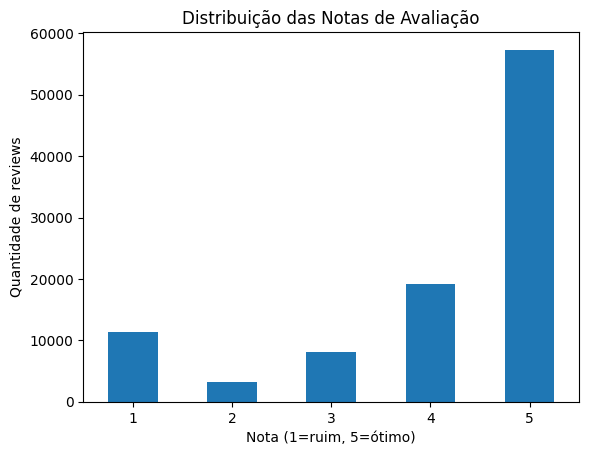

In [ ]:
score_counts = df['review_score'].value_counts().sort_index()
score_percentage = df['review_score'].value_counts(normalize=True).sort_index() * 100
display(Markdown("#### Contagem de Avaliações por Nota:"))
print(score_counts)
display(Markdown("\n#### Percentual de Avaliações por Nota:"))
print(score_percentage.map('{:.2f}%'.format))

df['review_score'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição das Notas de Avaliação")
plt.xlabel("Nota (1=ruim, 5=ótimo)")
plt.ylabel("Quantidade de reviews")
plt.xticks(rotation=0)
plt.show()



---


* Sentimento Positivo Dominante: A grande maioria das avaliações é extremamente positiva. As notas 5 sozinhas representam 57.8% do dataset. Somadas às notas 4 (19.3%), as avaliações positivas compõem mais de 77% do total.

* Desbalanceamento de Classes: Existe um forte desbalanceamento nos dados. Há muito mais exemplos de clientes satisfeitos do que insatisfeitos. Esta é uma informação crítica que precisará ser tratada durante a etapa de modelagem para evitar que o modelo se torne enviesado para a classe majoritária.

---



# Relação Comentário vs. Nota


In [ ]:
#separa as reviews com comentário
df['tem_texto'] = df['review_comment_message'].notna()

#Tabela de Valores Absolutos
display(Markdown("### Contagem de Avaliações"))
tabela_abs = pd.crosstab(df['review_score'], df['tem_texto'])
tabela_abs.columns = ['Sem Comentário', 'Com Comentário']
tabela_abs.index.name = 'Nota da Avaliação'
display(tabela_abs)

# Tabela de Porcentagens
display(Markdown("###Proporção de Avaliações com/sem Comentário por Nota (%)"))
tabela_pct = pd.crosstab(df['review_score'], df['tem_texto'], normalize='index') * 100
tabela_pct.columns = ['Sem Comentário (%)', 'Com Comentário (%)']
tabela_pct.index.name = 'Nota da Avaliação'
display(tabela_pct.round(2))

#Porcentagem Geral de Comentários no Dataset
display(Markdown("### Porcentagem Geral de Comentários no Dataset"))
pct_geral_comentarios = df['tem_texto'].mean() * 100
print(f"No geral, {pct_geral_comentarios:.1f}% de todas as avaliações possuem comentário.")

### Contagem de Avaliações

,Sem Comentário,Com Comentário
Nota da Avaliação,,
1,2679,8745
2,1006,2145
3,4622,3557
4,13166,5976
5,36774,20554


###Proporção de Avaliações com/sem Comentário por Nota (%)

,Sem Comentário (%),Com Comentário (%)
Nota da Avaliação,,
1,23.45,76.55
2,31.93,68.07
3,56.51,43.49
4,68.78,31.22
5,64.15,35.85


### Porcentagem Geral de Comentários no Dataset

No geral, 41.3% de todas as avaliações possuem comentário.


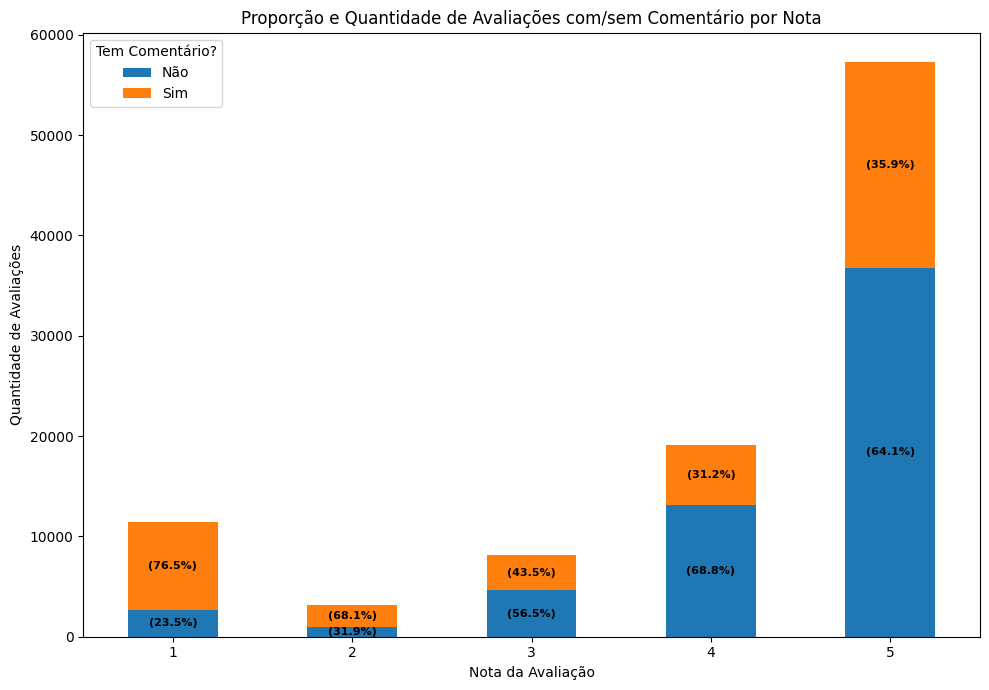

In [ ]:
df['tem_texto'] = df['review_comment_message'].notna()
df_plot = df.groupby(['review_score', 'tem_texto']).size().unstack().fillna(0)

# Calcula os totais por nota para encontrar o percentual
totals = df_plot.sum(axis=1)
df_perc = df_plot.div(totals, axis=0) * 100


ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 7))

for i, total in enumerate(totals):
    y_offset = 0
    for col in df_plot.columns:
        count_value = df_plot.iloc[i][col]
        perc_value = df_perc.iloc[i][col]

        # Ignora segmentos com contagem zero
        if count_value == 0:
            continue

        # Calcula a posição Y do texto (no meio do segmento da barra)
        y_pos = y_offset + (count_value / 2)

        label = f"({perc_value:.1f}%)"
        ax.text(x=i, y=y_pos, s=label,
                ha='center', va='center',
                color=text_color, fontsize=8, weight='bold')

        # Atualiza o offset para o próximo segmento
        y_offset += count_value


plt.title("Proporção e Quantidade de Avaliações com/sem Comentário por Nota")
plt.xlabel("Nota da Avaliação")
plt.ylabel("Quantidade de Avaliações")
plt.xticks(rotation=0)
plt.legend(title='Tem Comentário?', labels=['Não', 'Sim'])

plt.tight_layout()
plt.show()



---


* Insatisfação Gera Engajamento: Clientes insatisfeitos são os mais propensos a
deixar um comentário. Notas 1 e 2 têm as maiores taxas de feedback textual, com 76.6% e 68.1%, respectivamente. A insatisfação é um forte motivador para a escrita.

* Satisfação Extrema Também Motiva: Curiosamente, a nota 5 tem uma taxa de comentários (35.9%) visivelmente maior que a nota 4 (31.2%). Isso sugere que clientes muito satisfeitos também se sentem motivados a compartilhar sua experiência.

* Neutros/Mornos Comentam Menos: As notas 3 e 4, que representam uma experiência "OK" ou "boa", são as que menos geram comentários escritos.


---



# Comprimento dos textos

In [ ]:
# Filtra para manter apenas as avaliações com texto e
df_com_texto = df.dropna(subset=['review_comment_message']).copy()
print(f"Número de avaliações com comentários: {len(df_com_texto)}")

df_com_texto['qtd_palavras'] = df_com_texto['review_comment_message'].apply(lambda x: len(x.split()))
display(Markdown("### Estatísticas Descritivas do Comprimento dos Comentários"))
display(df_com_texto['qtd_palavras'].describe().astype(int))

Número de avaliações com comentários: 40977


### Estatísticas Descritivas do Comprimento dos Comentários

,qtd_palavras
count,40977
mean,11
std,9
min,0
25%,4
50%,9
75%,16
max,45




---


* **Comentários Curtos e Diretos:** A média de palavras por comentário é de 11, mas a mediana (50% dos dados) é ainda menor, com apenas 9 palavras. Isso indica que a maioria dos clientes que escrevem o fazem de forma breve e direta.
* **Conciso é o Padrão:** 75% de todos os comentários possuem 16 palavras ou menos. Comentários longos são a exceção, não a regra.
* **Implicações para a Modelagem:** A natureza concisa dos textos é uma informação valiosa. Ela sugere que não precisaremos de técnicas complexas para lidar com textos muito longos (como truncamento pesado ou sumarização). Modelos baseados em frequência de palavras, como o TF-IDF, tendem a funcionar bem neste cenário, pois as palavras mais importantes para o sentimento provavelmente estarão presentes nesses textos curtos.


---



# Exemplo Qualitativo

In [ ]:
print("Exemplo review ruim (1 estrela):")
print(df.loc[df['review_score']==1,'review_comment_message'].dropna().sample(1).values[0])
print("\nExemplo review boa (5 estrelas):")
print(df.loc[df['review_score']==5,'review_comment_message'].dropna().sample(1).values[0])

Exemplo review ruim (1 estrela):
O peoduto veio com defeito

Exemplo review boa (5 estrelas):
Comprarei sempre neste site


#Análise Temporal


* nova variável para medir quanto tempo demorou para a avaliação ser respondida

,review_creation_date,review_answer_timestamp,tempo_de_resposta
0,2018-01-18,2018-01-18 21:46:59,0.907627
1,2018-03-10,2018-03-11 03:05:13,1.128623
2,2018-02-17,2018-02-18 14:36:24,1.608611
3,2017-04-21,2017-04-21 22:02:06,0.918125
4,2018-03-01,2018-03-02 10:26:53,1.435336


Agora, vamos visualizar como o tempo de resposta se distribui para cada nota usando um boxplot.

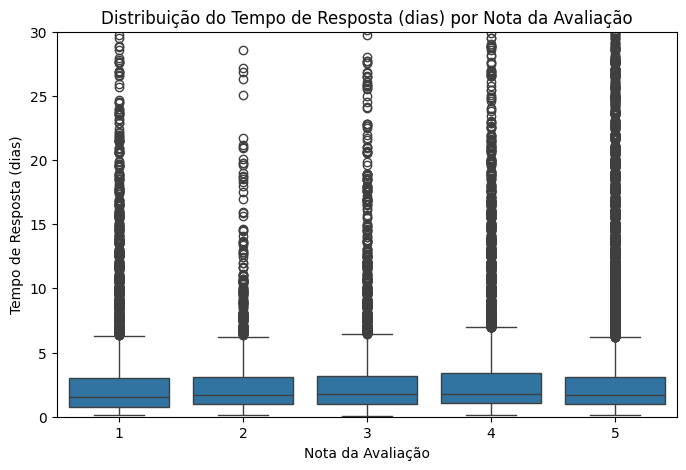

In [ ]:
# Calcula a diferença entre a resposta e a criação
df['tempo_de_resposta'] = (df['review_answer_timestamp'] - df['review_creation_date']).dt.total_seconds() / (60 * 60 * 24) # Converte para dias

display(df[['review_creation_date', 'review_answer_timestamp', 'tempo_de_resposta']].head())

display(Markdown("Agora, vamos visualizar como o tempo de resposta se distribui para cada nota usando um boxplot."))

plt.figure(figsize=(8, 5))
sns.boxplot(x='review_score', y='tempo_de_resposta', data=df)
plt.title("Distribuição do Tempo de Resposta (dias) por Nota da Avaliação")
plt.xlabel("Nota da Avaliação")
plt.ylabel("Tempo de Resposta (dias)")
plt.ylim(0, 30) # Limita o eixo Y para melhor visualização, removendo outliers extremos
plt.show()



---


* A mediana do tempo de resposta é visivelmente menor para as notas mais altas (4 e 5), sugerindo que avaliações respondidas mais rapidamente tendem a ser mais positivas.

* Avaliações com nota 1 apresentam a maior dispersão no tempo de resposta, incluindo os casos mais demorados.

* Embora a correlação não seja forte, a análise sugere que o tempo de resposta pode ser uma feature útil para o modelo


---



# CONLUSÕES DO EDA

Após uma análise detalhada dos dados de avaliação, podemos extrair os seguintes insights chave:

1.  **Dados de Texto são Valiosos, mas Esparsos:** As colunas de comentários contêm informações ricas, porém estão ausentes em mais da metade do dataset. A modelagem deverá focar no subconjunto de dados que possui texto.

2.  **Sentimento Geral é Altamente Positivo:** O dataset é fortemente desbalanceado, com uma predominância de notas 4 e 5. Esta característica deve ser tratada na etapa de modelagem (ex: usando estratificação na divisão dos dados, ou técnicas de reamostragem) para garantir que o modelo aprenda a identificar também as classes minoritárias (notas baixas).

3.  **Texto é um Forte Indicador de Emoção:** A presença de um comentário está fortemente correlacionada com notas muito altas (5) ou muito baixas (1 e 2). A análise qualitativa confirmou que os textos contêm sinais claros e distintos de sentimento, validando seu uso para tarefas de classificação.

4.  **O Tempo de Resposta Pode ser Relevante:** A análise temporal revelou a `tempo_de_resposta` como uma *feature* potencialmente útil. Embora a correlação não seja forte, observou-se uma tendência de que respostas mais rápidas estão associadas a avaliações ligeiramente melhores, um insight valioso tanto para a modelagem quanto para o negócio.

**Próximos Passos:**
Com base nestes insights, o caminho está claro para a próxima fase. O notebook **`treinamento_modelo.ipynb`** irá focar em construir um modelo de classificação de sentimento (Positivo vs. Negativo) utilizando os comentários em texto e, potencialmente, a feature de tempo de resposta.